 # Le pedí a ChatGPT ejercicios para comenzar a practicar con esto, y me dio los siguientes ejercicios:

Carga el DataFrame de Pokémon desde el archivo CSV proporcionado y crea un nuevo DataFrame que solo contenga las columnas "Name", "Type 1" y "Type 2". Luego, muestra las primeras 10 filas del nuevo DataFrame.


In [177]:
import pandas as pd


In [178]:
pokedex = pd.read_csv('/Users/daniboy/Desktop/Data_Science_ChatGPT/Pandas/Pokemon/pokemon_data.csv')
pokedex.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [179]:
df = pokedex[['Name', 'Type 1', 'Type 2']]
df.head(10)

,Name,Type 1,Type 2
0,Bulbasaur,Grass,Poison
1,Ivysaur,Grass,Poison
2,Venusaur,Grass,Poison
3,VenusaurMega Venusaur,Grass,Poison
4,Charmander,Fire,NaN
5,Charmeleon,Fire,NaN
6,Charizard,Fire,Flying
7,CharizardMega Charizard X,Fire,Dragon
8,CharizardMega Charizard Y,Fire,Flying
9,Squirtle,Water,NaN


Crea un gráfico de barras que muestre la cantidad de Pokémon de cada tipo primario ("Type 1") en el DataFrame.

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns 


In [181]:
type1_counts = pokedex['Type 1'].value_counts()
type1_counts


Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

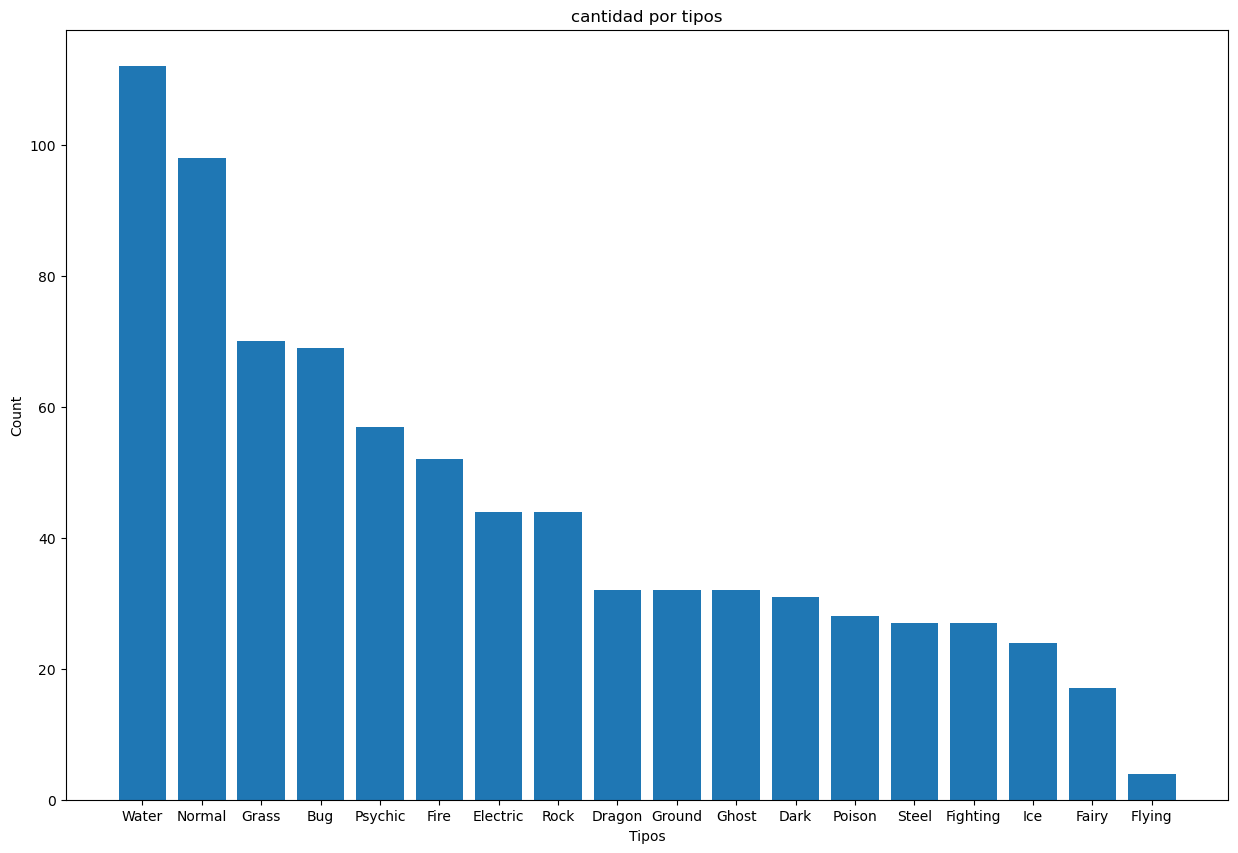

In [182]:
# Se hizo un conteo por valores, y el index es para asignar las columnas
plt.figure(figsize=(15,10))
plt.bar(type1_counts.index, type1_counts)
plt.xlabel('Tipos')
plt.ylabel('Count')
plt.title('cantidad por tipos')
plt.show()

In [183]:
pokedex.loc[pokedex['Type 1'] == 'Flying']

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
702,641,TornadusIncarnate Forme,Flying,NaN,79,115,70,125,80,111,5,True
703,641,TornadusTherian Forme,Flying,NaN,79,100,80,110,90,121,5,True
790,714,Noibat,Flying,Dragon,40,30,35,45,40,55,6,False
791,715,Noivern,Flying,Dragon,85,70,80,97,80,123,6,False


3. Encuentra los Pokémon con la velocidad ("Speed") más alta y más baja en el DataFrame. Muestra sus nombres y velocidades. 

In [184]:
pokedex.sort_values('Speed', ascending=False, inplace=True)



In [185]:
pokedex.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
431,386,DeoxysSpeed Forme,Psychic,NaN,50,95,90,95,90,180,3,True
315,291,Ninjask,Bug,Flying,61,90,45,50,50,160,3,False
428,386,DeoxysNormal Forme,Psychic,NaN,50,150,50,150,50,150,3,True
154,142,AerodactylMega Aerodactyl,Rock,Flying,80,135,85,70,95,150,1,False
71,65,AlakazamMega Alakazam,Psychic,NaN,55,50,65,175,95,150,1,False


In [186]:
fastest_pokemon = pokedex.loc[pokedex['Speed'].idxmax()]
slowest_pokemon = pokedex.loc[pokedex['Speed'].idxmin()]
fastest_pokemon

#                           386
Name          DeoxysSpeed Forme
Type 1                  Psychic
Type 2                      NaN
HP                           50
Attack                       95
Defense                      90
Sp. Atk                      95
Sp. Def                      90
Speed                       180
Generation                    3
Legendary                  True
Name: 431, dtype: object

In [187]:
print("El pokemon con la velocidad mas alta es: ", fastest_pokemon['Name'])
print("El Pokémon más rápido es {} con una velocidad de {}.".format(fastest_pokemon['Name'], fastest_pokemon['Speed']))

El pokemon con la velocidad mas alta es:  DeoxysSpeed Forme
El Pokémon más rápido es DeoxysSpeed Forme con una velocidad de 180.


Crea un nuevo DataFrame que contenga solo los Pokémon legendarios. Muestra los nombres de los Pokémon legendarios y cuántos de ellos hay en el DataFrame.

In [188]:
Legendaries = pokedex.loc[pokedex['Legendary'] == True]
Legendaries['Name']

431      DeoxysSpeed Forme
428     DeoxysNormal Forme
429     DeoxysAttack Forme
164    MewtwoMega Mewtwo Y
162                 Mewtwo
              ...         
797    HoopaHoopa Confined
414               Regirock
416              Registeel
415                 Regice
795                Diancie
Name: Name, Length: 65, dtype: object

In [189]:
Legendaries.value_counts()

#    Name                      Type 1    Type 2    HP   Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary
144  Articuno                  Ice       Flying    90   85      100      95       125      85     1           True         1
145  Zapdos                    Electric  Flying    90   90      85       125      90       100    1           True         1
639  Terrakion                 Rock      Fighting  91   129     90       72       90       108    5           True         1
640  Virizion                  Grass     Fighting  91   90      72       90       129      108    5           True         1
642  ThundurusIncarnate Forme  Electric  Flying    79   115     70       125      80       111    5           True         1
     ThundurusTherian Forme    Electric  Flying    79   105     70       145      80       101    5           True         1
643  Reshiram                  Dragon    Fire      100  120     100      150      120      90     5           True         1
644  

In [190]:
Legendaries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65 entries, 431 to 795
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           65 non-null     int64 
 1   Name        65 non-null     object
 2   Type 1      65 non-null     object
 3   Type 2      40 non-null     object
 4   HP          65 non-null     int64 
 5   Attack      65 non-null     int64 
 6   Defense     65 non-null     int64 
 7   Sp. Atk     65 non-null     int64 
 8   Sp. Def     65 non-null     int64 
 9   Speed       65 non-null     int64 
 10  Generation  65 non-null     int64 
 11  Legendary   65 non-null     bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 6.2+ KB


In [191]:
print(f'La cantidad de legendarios es: {len(Legendaries)}')

La cantidad de legendarios es: 65


Crea un histograma que muestre la distribución de las estadísticas de ataque ("Attack") de todos los Pokémon en el DataFrame.

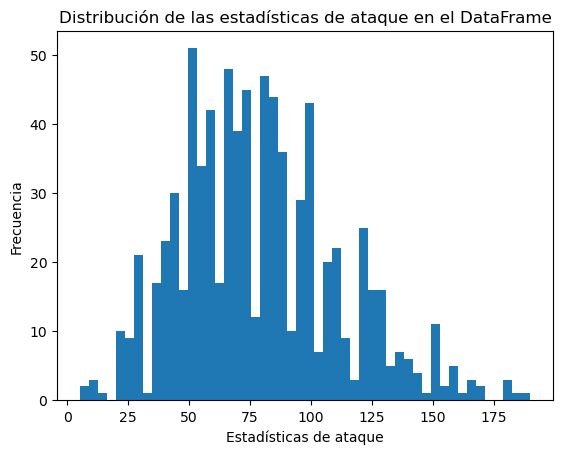

In [192]:
pokedex['Attack'].plot(kind='hist', bins=50)
plt.xlabel('Estadísticas de ataque')
plt.ylabel('Frecuencia')
plt.title('Distribución de las estadísticas de ataque en el DataFrame')
plt.show()

Encuentra el Pokémon más fuerte y más débil en términos de estadísticas totales ("Total") en el DataFrame. Muestra su nombre y estadísticas totales.

In [193]:
pokedex['Total'] = (pokedex['Attack'] + pokedex['Defense'] + pokedex['Sp. Atk'] + pokedex['Sp. Def'] + pokedex['Speed'] + pokedex['HP'])


In [194]:
strongest = pokedex.loc[pokedex['Total'].idxmax()]
weakest = pokedex.loc[pokedex['Total'].idxmin()]


In [195]:
print(f'El pokemon con las estadisticas mas altas es: {strongest["Name"]} con {strongest["Total"]} puntos.')
print(f'El pokemon con las estadisticas mas bajas es: {weakest["Name"]} con {weakest["Total"]} puntos.')

El pokemon con las estadisticas mas altas es: MewtwoMega Mewtwo Y con 780 puntos.
El pokemon con las estadisticas mas bajas es: Sunkern con 180 puntos.


Crea un nuevo DataFrame que contenga solo los Pokémon de los tipos "Water" y "Fire". Muestra el nombre y tipo de los 10 Pokémon más fuertes en términos de estadísticas totales.

In [196]:
water_fire_df = pokedex[(pokedex['Type 1'] == 'Water') | (pokedex['Type 1'] == 'Fire') | (pokedex['Type 2'] == 'Water') | (df['Type 2'] == 'Fire')]

# Ordenar el DataFrame por estadísticas totales y mostrar los 10 Pokémon más fuertes
top_10 = water_fire_df.sort_values(by='Total', ascending=False).head(10)
print(top_10[['Name', 'Type 1','Type 2', 'Total']])

                          Name  Type 1  Type 2  Total
424      GroudonPrimal Groudon  Ground    Fire    770
422        KyogrePrimal Kyogre   Water     NaN    770
270                      Ho-oh    Fire  Flying    680
541                     Palkia   Water  Dragon    680
706                   Reshiram  Dragon    Fire    680
421                     Kyogre   Water     NaN    670
141      GyaradosMega Gyarados   Water    Dark    640
283      SwampertMega Swampert   Water  Ground    635
7    CharizardMega Charizard X    Fire  Dragon    634
8    CharizardMega Charizard Y    Fire  Flying    634


/var/folders/xf/nkmp0gn94v1bjxp47j6nsslc0000gp/T/ipykernel_2126/2578841437.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  water_fire_df = pokedex[(pokedex['Type 1'] == 'Water') | (pokedex['Type 1'] == 'Fire') | (pokedex['Type 2'] == 'Water') | (df['Type 2'] == 'Fire')]


In [197]:
pokedex.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
431,386,DeoxysSpeed Forme,Psychic,NaN,50,95,90,95,90,180,3,True,600
315,291,Ninjask,Bug,Flying,61,90,45,50,50,160,3,False,456
428,386,DeoxysNormal Forme,Psychic,NaN,50,150,50,150,50,150,3,True,600
154,142,AerodactylMega Aerodactyl,Rock,Flying,80,135,85,70,95,150,1,False,615
71,65,AlakazamMega Alakazam,Psychic,NaN,55,50,65,175,95,150,1,False,590


In [198]:
fuerte = pokedex.loc[pokedex['Total'].idxmax()]
fuerte[['Name', 'Type 1', 'Total']]

Name      MewtwoMega Mewtwo Y
Type 1                Psychic
Total                     780
Name: 164, dtype: object

<BarContainer object of 18 artists>

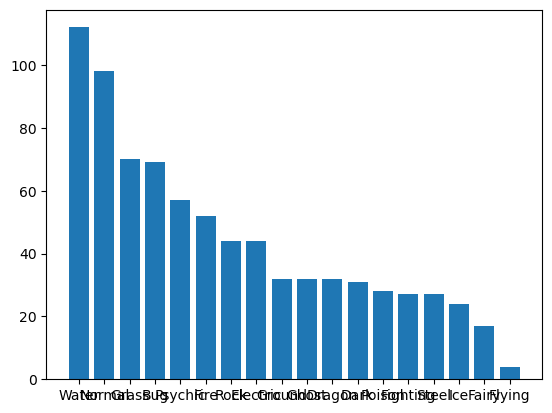

In [199]:
graph = pokedex['Type 1'].value_counts()
plt.bar(graph.index,graph)

__Ejercicio 1: Crea una función que reciba como parámetro el tipo de Pokémon y devuelva la cantidad promedio de cada estadística de combate de los Pokémon de ese tipo.__

<p> Este me gusta, me va a poner a pensar</p>

In [200]:
def average_type_stats(Tipo):
    Type = pokedex.loc[(pokedex['Type 1'] == Tipo )|( pokedex['Type 2'] == Tipo)]
    print(f"La cantidad promedio de cada estadistica es: \n HP: {Type['HP'].mean()} \n Attack: {Type['Attack'].mean()} \n Defense: {Type['Defense'].mean()} \n Sp. Atk: {Type['Sp. Atk'].mean()} \n Sp. Def: {Type['Sp. Def'].mean()} \n Speed: {Type['Speed'].mean()} \n Total: {Type['Total'].mean()}")

In [201]:
average_type_stats('Water')

La cantidad promedio de cada estadistica es: 
 HP: 71.02380952380952 
 Attack: 73.7063492063492 
 Defense: 74.2936507936508 
 Sp. Atk: 74.77777777777777 
 Sp. Def: 70.30952380952381 
 Speed: 64.98412698412699 
 Total: 429.0952380952381


In [202]:
average_type_stats('Bug')

La cantidad promedio de cada estadistica es: 
 HP: 56.736111111111114 
 Attack: 71.76388888888889 
 Defense: 71.11111111111111 
 Sp. Atk: 53.56944444444444 
 Sp. Def: 64.66666666666667 
 Speed: 61.68055555555556 
 Total: 379.52777777777777


In [203]:
average_type_stats('Dragon')

La cantidad promedio de cada estadistica es: 
 HP: 82.9 
 Attack: 105.76 
 Defense: 86.62 
 Sp. Atk: 97.44 
 Sp. Def: 86.9 
 Speed: 82.14 
 Total: 541.76


In [204]:
average_type_stats('Fairy')

La cantidad promedio de cada estadistica es: 
 HP: 68.475 
 Attack: 61.575 
 Defense: 70.4 
 Sp. Atk: 76.5 
 Sp. Def: 83.125 
 Speed: 55.85 
 Total: 415.925


In [205]:
average_type_stats('Steel')

La cantidad promedio de cada estadistica es: 
 HP: 64.95918367346938 
 Attack: 92.65306122448979 
 Defense: 116.61224489795919 
 Sp. Atk: 72.10204081632654 
 Sp. Def: 83.16326530612245 
 Speed: 57.10204081632653 
 Total: 486.59183673469386


In [206]:
average_type_stats('Psychic')

La cantidad promedio de cada estadistica es: 
 HP: 71.21111111111111 
 Attack: 72.64444444444445 
 Defense: 74.77777777777777 
 Sp. Atk: 94.6 
 Sp. Def: 86.76666666666667 
 Speed: 77.08888888888889 
 Total: 477.0888888888889


In [207]:
average_type_stats('Ground')

La cantidad promedio de cada estadistica es: 
 HP: 75.58208955223881 
 Attack: 92.67164179104478 
 Defense: 87.70149253731343 
 Sp. Atk: 61.208955223880594 
 Sp. Def: 64.83582089552239 
 Speed: 59.07462686567164 
 Total: 441.07462686567163


In [208]:
pokedex['Type 1'].value_counts()

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

In [209]:
pokedex.sort_index(ascending=True, inplace=True)

Busca por filas y columnas. 
Cual es la diferencia entre loc e iloc?
loc busca por rows y columns. iloc busca por indices, por eso de su inicial

In [210]:
pokedex.iloc[:100:2, 0:4]

,#,Name,Type 1,Type 2
0,1,Bulbasaur,Grass,Poison
2,3,Venusaur,Grass,Poison
4,4,Charmander,Fire,NaN
6,6,Charizard,Fire,Flying
8,6,CharizardMega Charizard Y,Fire,Flying
10,8,Wartortle,Water,NaN
12,9,BlastoiseMega Blastoise,Water,NaN
14,11,Metapod,Bug,NaN
16,13,Weedle,Bug,Poison
18,15,Beedrill,Bug,Poison


In [211]:
pokedex.loc[:100:2, ['#','Name', 'Type 1', 'Type 2']]

,#,Name,Type 1,Type 2
0,1,Bulbasaur,Grass,Poison
2,3,Venusaur,Grass,Poison
4,4,Charmander,Fire,NaN
6,6,Charizard,Fire,Flying
8,6,CharizardMega Charizard Y,Fire,Flying
10,8,Wartortle,Water,NaN
12,9,BlastoiseMega Blastoise,Water,NaN
14,11,Metapod,Bug,NaN
16,13,Weedle,Bug,Poison
18,15,Beedrill,Bug,Poison


In [212]:
pokedex

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,600
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,700
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,600
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,680


In [213]:
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
 12  Total       800 non-null    int64 
dtypes: bool(1), int64(9), object(3)
memory usage: 114.3+ KB


# Eliminar columnas
En este caso eliminaré el numero en la pokedex, ya que es el mismo al de las filas

In [214]:
pokedex.drop('#', axis=1, inplace=True)

In [215]:
pokedex.drop(range(5))

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False,405
6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False,534
7,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,634
8,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,634
9,Squirtle,Water,NaN,44,48,65,50,64,43,1,False,314
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,600
796,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,700
797,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,600
798,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,680


Transforma un valor categorico a numerico, y luego buscalo con loc

In [216]:
cat_to_num = pokedex['Type 1'].replace(to_replace='Fire', value=1, inplace=True)

In [217]:
cat_to_num = pokedex['Type 1'].replace(to_replace=1, value='Fire', inplace=True)

In [218]:
cat_to_num

In [219]:
pokedex

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,600
796,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,700
797,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,600
798,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,680


In [220]:
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   HP          800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   Sp. Atk     800 non-null    int64 
 7   Sp. Def     800 non-null    int64 
 8   Speed       800 non-null    int64 
 9   Generation  800 non-null    int64 
 10  Legendary   800 non-null    bool  
 11  Total       800 non-null    int64 
dtypes: bool(1), int64(8), object(3)
memory usage: 108.1+ KB


Histograma de tipos de Pokemon: Crea un histograma que muestre la frecuencia de cada tipo de Pokemon en el conjunto de datos. Utiliza la columna 'Type 1' para este ejercicio.

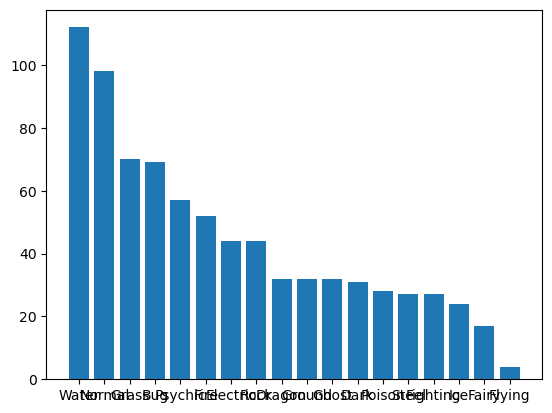

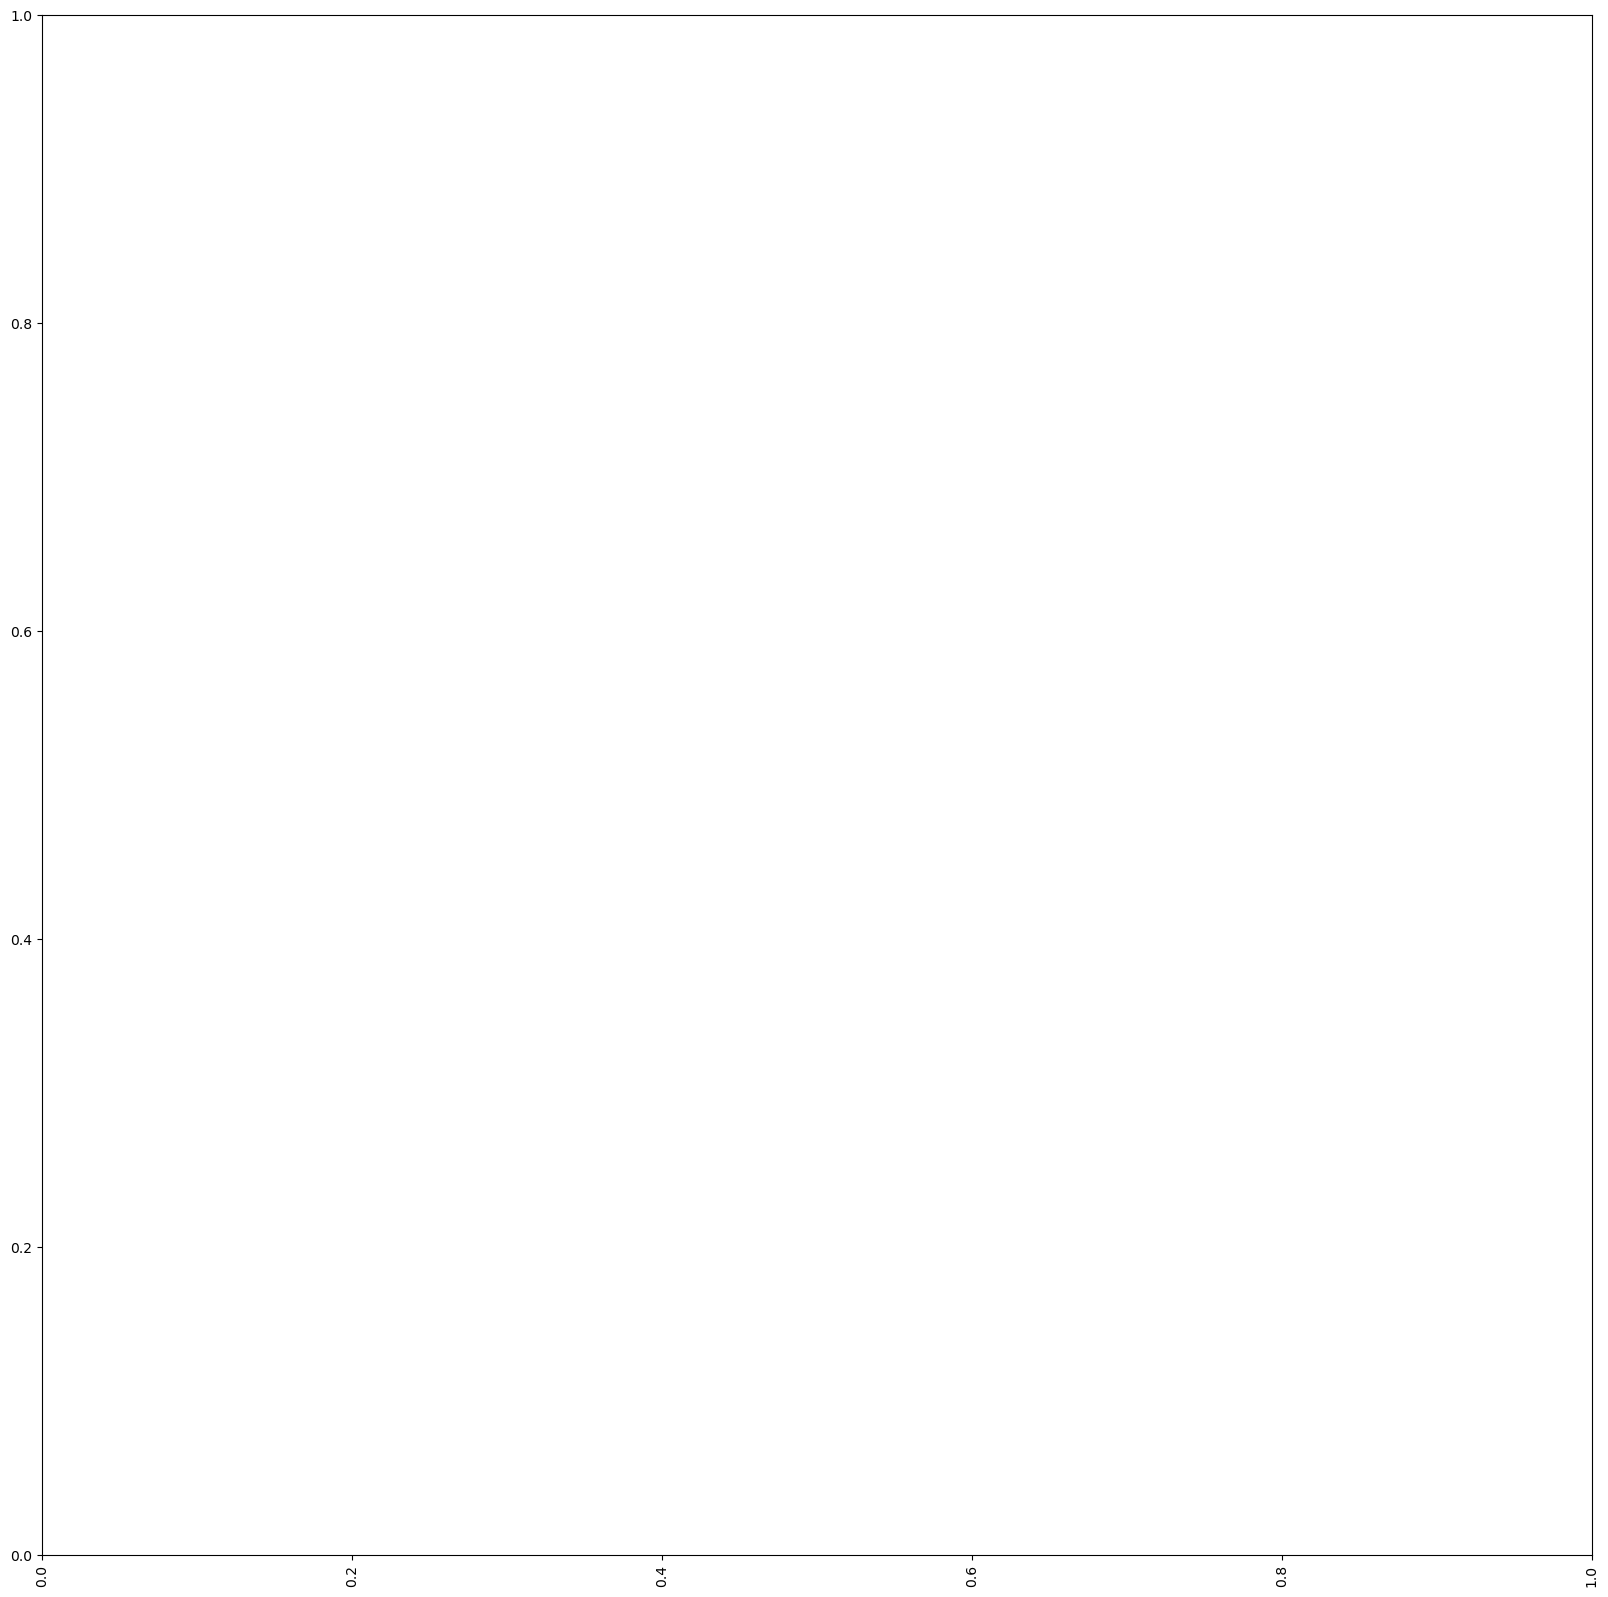

In [221]:
frecuencia_tipos = pokedex['Type 1'].value_counts()
plt.bar(frecuencia_tipos.index, frecuencia_tipos.values)
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

## Boxplot de la estadística de ataque por tipo de Pokemon: Crea un boxplot que muestre la estadística de ataque de los diferentes tipos de Pokemon en el conjunto de datos. Utiliza la columna 'Type 1' para este ejercicio.

In [222]:
pokedex.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309


In [223]:
import seaborn as sns

In [224]:
Type = pokedex.loc[pokedex['Type 1'] == 'Grass']

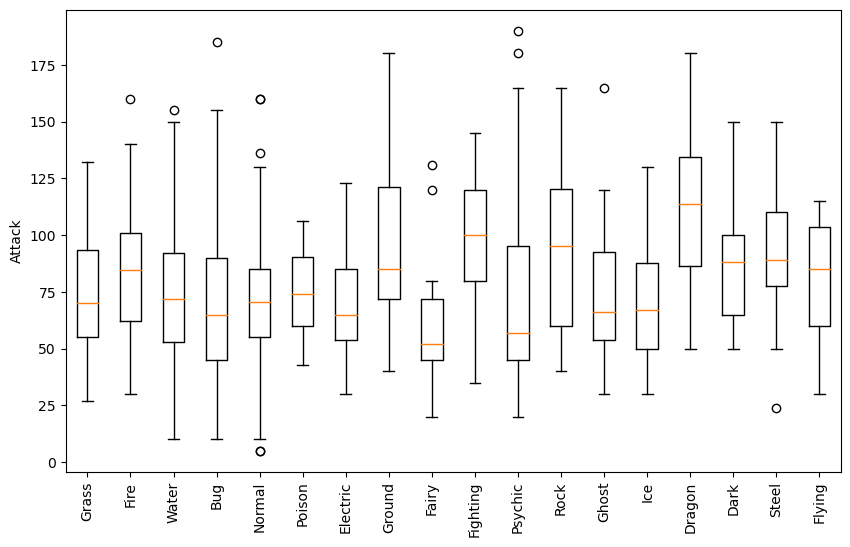

In [225]:
import pandas as pd
import matplotlib.pyplot as plt

pokemon_data = pd.read_csv('/Users/daniboy/Desktop/Data_Science_ChatGPT/Pandas/Pokemon/pokemon_data.csv')
plt.figure(figsize=(10, 6))
plt.boxplot([pokemon_data[pokemon_data['Type 1'] == t]['Attack'] for t in pokemon_data['Type 1'].unique()])
plt.xticks(range(1, len(pokemon_data['Type 1'].unique()) + 1), pokemon_data['Type 1'].unique(), rotation=90)
plt.ylabel('Attack')
plt.show()

### <span style= 'color: magenta'> Gráfico de dispersión de estadísticas base: Crea un gráfico de dispersión que muestre la relación entre las estadísticas de ataque y defensa base de los Pokemon. Utiliza las columnas 'Attack' y 'Defense' para este ejercicio. </span>

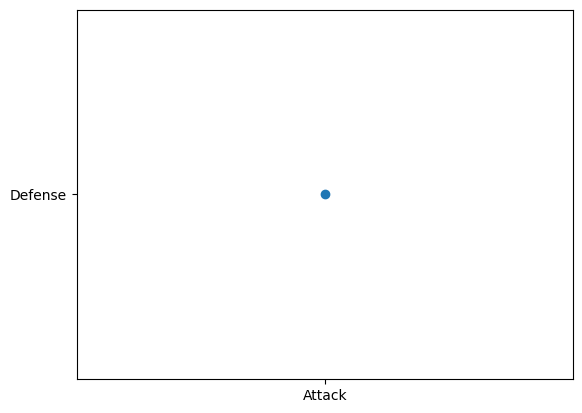

In [226]:
plt.scatter(data='pokedex', x='Attack', y='Defense')
plt.show()

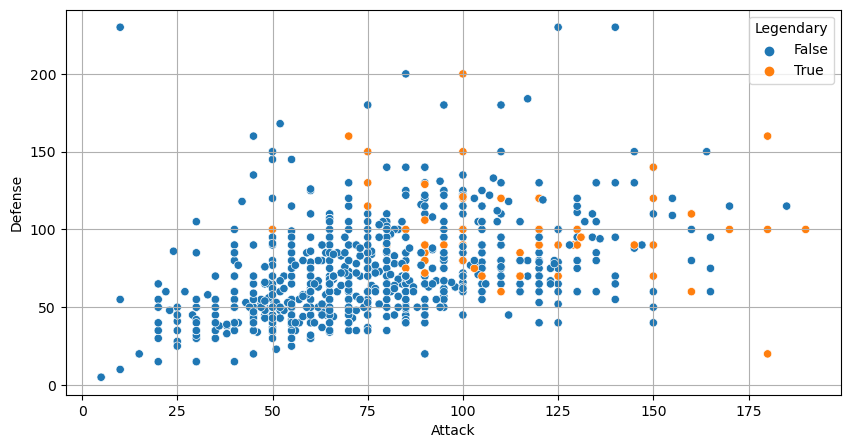

In [232]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=pokedex, x='Attack', y='Defense', hue='Legendary')
plt.grid()

In [241]:
pokedex.loc[ (pokedex['Defense'] == 100) & (pokedex['Attack'] == 50)]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
302,Pelipper,Water,Flying,60,50,100,85,70,65,3,False,430
415,Regice,Ice,NaN,80,50,100,100,200,50,3,True,580
